# **RNN Introduction**


## Importing required libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [2]:
traffic = pd.read_csv('/content/traffic.csv')

In [3]:
traffic.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


## Visualization

In [5]:
# Convert 'DateTime' column to datetime
traffic['DateTime'] = pd.to_datetime(traffic['DateTime'])

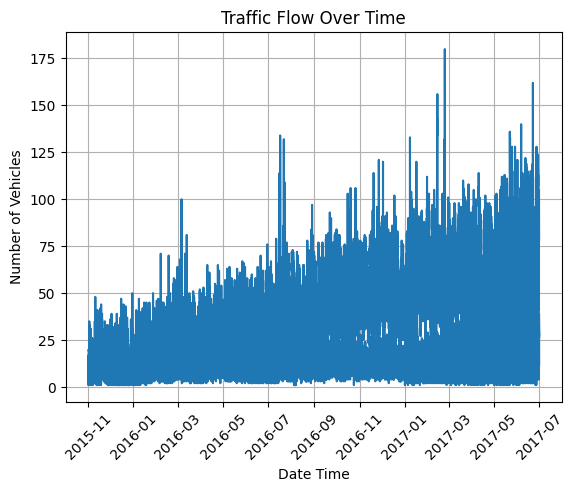

In [9]:
plt.plot(traffic['DateTime'], traffic['Vehicles'])
plt.xlabel('Date Time')
plt.ylabel('Number of Vehicles')
plt.title('Traffic Flow Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## Split the data into train and test

In [10]:
# Split the data into training and testing sets
train_size = int(len(traffic) * 0.8)
train_data = traffic.iloc[:train_size]
test_data = traffic.iloc[train_size:]

In [11]:
n_past = 60
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data['Vehicles'].iloc[i - n_past:i].values)
    y_train.append(train_data['Vehicles'].iloc[i])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data['Vehicles'].iloc[i - n_past:i].values)
    y_test.append(test_data['Vehicles'].iloc[i])
X_test, y_test = np.array(X_test), np.array(y_test)

In [12]:
X_train.shape

(38436, 60)

In [13]:
y_train.shape

(38436,)

In [14]:
X_test.shape

(9564, 60)

In [15]:
y_test.shape

(9564,)

In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Modeling


In [17]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 60, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
checkpoints = ModelCheckpoint(filepath = 'my_weights.keras', save_best_only = True)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50, batch_size=64, verbose=1, callbacks= [checkpoints, early_stopping])

Epoch 1/50
601/601 ━━━━━━━━━━━━━━━━━━━━ 36s 59ms/step - loss: 46.2027 - val_loss: 31.5002
Epoch 2/50
601/601 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - loss: 47.8557 - val_loss: 29.3406
Epoch 3/50
601/601 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - loss: 44.9142 - val_loss: 30.0391
Epoch 4/50
601/601 ━━━━━━━━━━━━━━━━━━━━ 36s 61ms/step - loss: 44.1683 - val_loss: 31.5658
Epoch 5/50
601/601 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - loss: 43.7827 - val_loss: 28.8069
Epoch 6/50
601/601 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - loss: 44.7076 - val_loss: 30.3512
Epoch 7/50
601/601 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - loss: 40.5000 - val_loss: 28.8766
Epoch 8/50
601/601 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - loss: 40.2033 - val_loss: 28.7662
Epoch 9/50
601/601 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - loss: 39.1122 - val_loss: 29.5906
Epoch 10/50
601/601 ━━━━━━━━━━━━━━━━━━━━ 35s 59ms/step - loss: 39.6207 - val_loss: 28.5351
Epoch 11/50
601/601 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - loss: 41.7204 - val_loss: 29.8754
Epoch 12

## Visualization of results


In [26]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1202/1202 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step
299/299 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


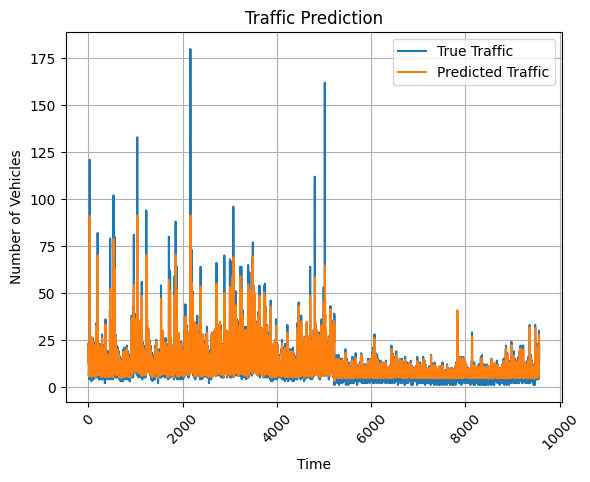

In [27]:
plt.plot(y_test, label='True Traffic')
plt.plot(test_predict, label='Predicted Traffic')
plt.xlabel('Time')
plt.ylabel('Number of Vehicles')
plt.title('Traffic Prediction')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [23]:
RMSE = math.sqrt(mean_squared_error(y_test, test_predict))
print(RMSE)

5.391064669082699
